# Load MNIST data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv("mnist_train.csv")
print(d0.head(5))
print(d0.columns)
l = d0['label']

d = d0.drop('label',axis=1) 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


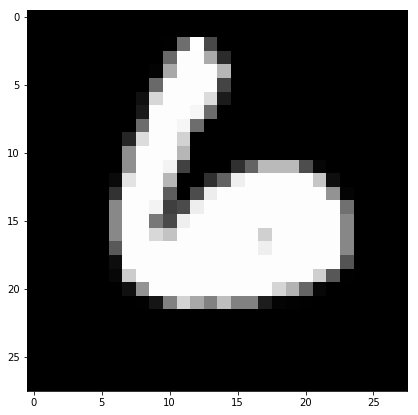

6


In [3]:
plt.figure(figsize=(7,7))
idx = 159

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

# 2D Visualization using PCA

In [8]:
labels = l.head(15000)
data = d.head(15000)

print(data.shape)

(15000, 784)


In [5]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)
print(std_data.shape)

(15000, 784)


In [10]:
sample_data = std_data
covar_matrix = (np.matmul(sample_data.T, sample_data))
print(covar_matrix.shape)                
                

(784, 784)


In [11]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix,eigvals=(782,783))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [12]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates.shape

(2, 15000)

In [13]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


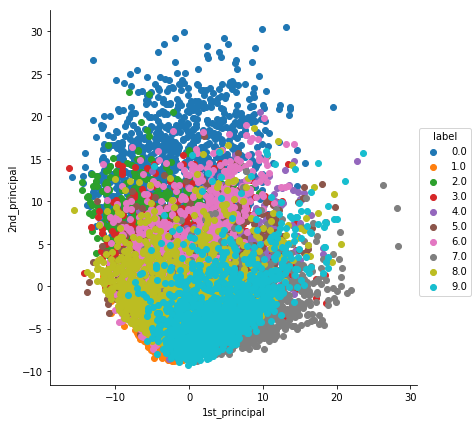

In [18]:
# ploting the 2d data points with seaborn

plt.close()
import seaborn as sn
sn.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [19]:
# intializing PCA
from sklearn import decomposition
pca = decomposition.PCA()


In [29]:
# configuring the parameter
# the number of component = 2 because we will visuallize in 2d
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(pca_data.shape)

(15000, 2)


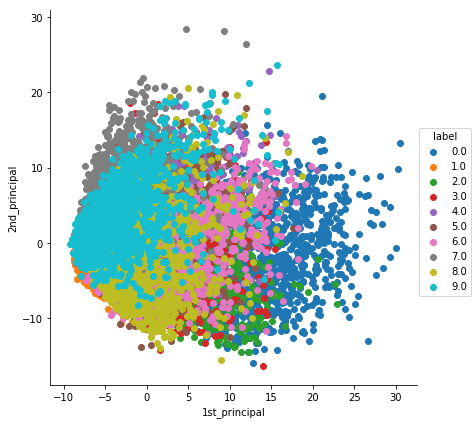

In [30]:
#attaching the label for each 2d data points
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data which will help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data, columns=('1st_principal','2nd_principal','label'))
sn.FacetGrid(data=pca_df, hue='label',size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()


# PCA for dimentionality reduction (not for visualization) 

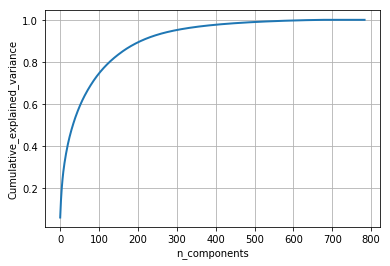

In [32]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#plot pca spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# t-SNE using  scikit-learn

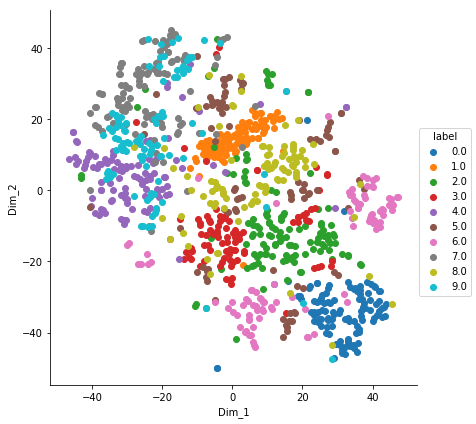

In [34]:
# TSNE
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15k points
data_1000 = std_data[0:1000,:]
label_1000 = labels[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

#creating a new data frame, which help us to plot the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=('Dim_1','Dim_2','label'))

#plotting the result of tsne
sn.FacetGrid(data=tsne_df, hue='label',size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.show()


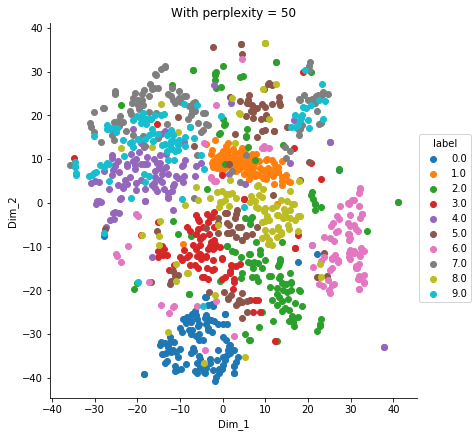

In [36]:
model = TSNE(n_components = 2, random_state = 0, perplexity=50)
tsne_data = model.fit_transform(data_1000)

#creating a new data frame, which help us to plot the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=('Dim_1','Dim_2','label'))

#plotting the result of tsne
sn.FacetGrid(data=tsne_df, hue='label',size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()



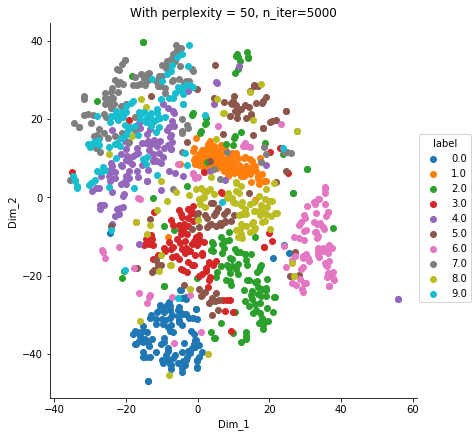

In [37]:
model = TSNE(n_components = 2, random_state = 0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)

#creating a new data frame, which help us to plot the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=('Dim_1','Dim_2','label'))

#plotting the result of tsne
sn.FacetGrid(data=tsne_df, hue='label',size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()